# WeatherPy


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
names = []
lat = []
lng = []
temp = []
cloud = []
windy = []
humid = []
ctry = []
date = []
record = 1
# testcity = ["paris", "london"]
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Making request number: {record} | {city}")
        record = record + 1
        names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        windy.append(response['wind']['speed'])
        humid.append(response['main']['humidity'])
        ctry.append(response['sys']['country'])
        date.append(response['dt'])

    except:
        print(f"Weather data does not exist for {city} | Skipping")
#         print(f"{response}")
        continue

    

Making request number: 1 | vaini
Making request number: 2 | rikitea
Making request number: 3 | barrow
Making request number: 4 | yar-sale
Making request number: 5 | morales
Making request number: 6 | mouzakion
Weather data does not exist for mouzakion | Skipping
Making request number: 7 | clonakilty
Making request number: 8 | hithadhoo
Making request number: 9 | belushya guba
Weather data does not exist for belushya guba | Skipping
Making request number: 10 | cam ranh
Making request number: 11 | illoqqortoormiut
Weather data does not exist for illoqqortoormiut | Skipping
Making request number: 12 | airai
Making request number: 13 | kabelvag
Making request number: 14 | sentyabrskiy
Weather data does not exist for sentyabrskiy | Skipping
Making request number: 15 | ushuaia
Making request number: 16 | albany
Making request number: 17 | thompson
Making request number: 18 | atuona
Making request number: 19 | saint-philippe
Making request number: 20 | port blair
Making request number: 21 | n

Making request number: 187 | luderitz
Making request number: 188 | attawapiskat
Weather data does not exist for attawapiskat | Skipping
Making request number: 189 | stykkisholmur
Making request number: 190 | namibe
Making request number: 191 | avarua
Making request number: 192 | bakchar
Making request number: 193 | norman wells
Making request number: 194 | ostrovnoy
Making request number: 195 | sao filipe
Making request number: 196 | dubai
Making request number: 197 | husavik
Making request number: 198 | longyearbyen
Making request number: 199 | praia
Making request number: 200 | barawe
Weather data does not exist for barawe | Skipping
Making request number: 201 | bolshaya irba
Weather data does not exist for bolshaya irba | Skipping
Making request number: 202 | barcelona
Making request number: 203 | akyab
Weather data does not exist for akyab | Skipping
Making request number: 204 | itacoatiara
Making request number: 205 | zolotinka
Weather data does not exist for zolotinka | Skipping


Making request number: 379 | san cristobal
Making request number: 380 | castro
Making request number: 381 | vengerovo
Making request number: 382 | floro
Making request number: 383 | mercedes
Making request number: 384 | leningradskiy
Making request number: 385 | rocha
Making request number: 386 | nova floresta
Making request number: 387 | aswan
Making request number: 388 | labuhan
Making request number: 389 | flinders
Making request number: 390 | sakete
Making request number: 391 | portland
Making request number: 392 | san antonio
Making request number: 393 | moerai
Making request number: 394 | abu samrah
Making request number: 395 | flagstaff
Making request number: 396 | jardim
Making request number: 397 | ifanadiana
Making request number: 398 | basco
Making request number: 399 | nuuk
Making request number: 400 | opuwo
Making request number: 401 | zyryanka
Making request number: 402 | coihaique
Making request number: 403 | bargal
Weather data does not exist for bargal | Skipping
Makin

Making request number: 568 | dinar
Making request number: 569 | glenwood springs
Making request number: 570 | honiara
Making request number: 571 | superior
Making request number: 572 | conde
Making request number: 573 | bafata
Making request number: 574 | abu dhabi
Making request number: 575 | guanica
Making request number: 576 | siwani
Weather data does not exist for siwani | Skipping
Making request number: 577 | mitu
Making request number: 578 | chimbote
Making request number: 579 | pedra azul
Making request number: 580 | metsovon
Weather data does not exist for metsovon | Skipping
Making request number: 581 | novobiryusinskiy
Making request number: 582 | bizhbulyak
Making request number: 583 | mazamari
Making request number: 584 | dzhebariki-khaya
Making request number: 585 | coquimbo
Making request number: 586 | qeshm
Making request number: 587 | loviisa
Making request number: 588 | beira
Making request number: 589 | zhezkazgan
Making request number: 590 | kamenskoye
Weather data d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weatherpy = {
    "City": names,
    "Cloudiness":cloud, 
    "Country":ctry,
    "Date":date, 
    "Humidity": humid,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": temp,
    "Wind Speed":windy
}

weatherpy1 = pd.DataFrame(weatherpy)

weatherpy1.to_csv("cities.csv",index=None, header=True)

In [16]:
cities_data = pd.read_csv("cities.csv")

cities_data.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [24]:
cities_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,0,IN,1553731200,94,15.34,74.49,71.60,1.36
1,Rikitea,100,PF,1553736084,100,-23.12,-134.97,74.79,6.62
2,Barrow,0,AR,1553736098,60,-38.31,-60.23,60.39,10.54
3,Yar-Sale,44,RU,1553736198,75,66.83,70.83,13.50,5.39
4,Morales,36,CO,1553736384,63,8.28,-73.87,84.96,3.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

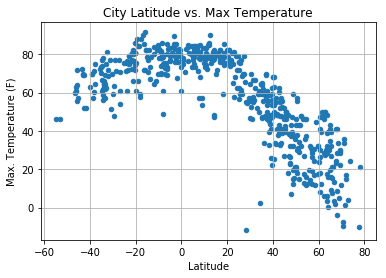

In [34]:
plt.scatter(x=cities_data["Lat"], y=cities_data["Max Temp"], marker="o", s=20)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Max_Temp_vs_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

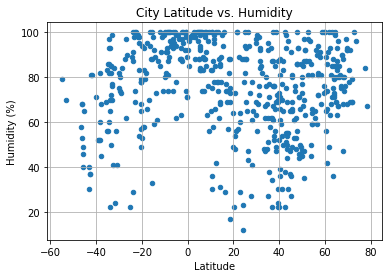

In [35]:
plt.scatter(x=cities_data["Lat"], y=cities_data["Humidity"], marker="o", s=20)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_Latitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

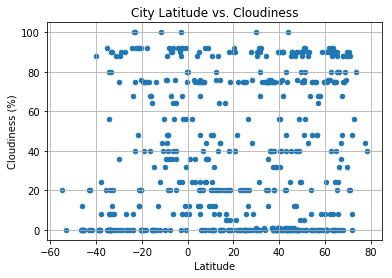

In [36]:
plt.scatter(x=cities_data["Lat"], y=cities_data["Cloudiness"], marker="o", s=20)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

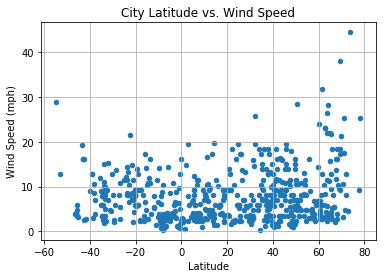

In [37]:
plt.scatter(x=cities_data["Lat"], y=cities_data["Wind Speed"], marker="o", s=20)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_Latitude.png")

plt.show()